# Image Classification using Fashion MNIST dataset  
**Course :** Machine Learning and AI in Finance     
**Lecturer :** Anindya Roy (anindya.ici@gmail.com)         

**Date :** 12.02.2022.    

* Dataset of about 70K images of clothing e.g. shoes and shirts.
* Model used : neural network. 
* Concepts : Loss function, optimiser, metrics.
* Libary : `tensorflow` 



**I. Setup**  
* Required only if running notebook from Google Colaboratory, for reading and writing to Google drive from notebook. May require to rerun this step if read or write after some time. 
* To be commented / removed if running notebook using local Jupyter installation.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**II. Import required libraries**   
* If running notebook using local Jupyter installation, required libraries must be installed manually using `pip install <library>` or `conda install library>`. 
* For Google Colab, these libraries are pre-installed. 

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf.random.set_seed(0)

**III. Downloading dataset + exploration**

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4431872/4422102 [==============================] - 0s 0us/step


**TODOs**  
* Print the list of all distinct class labels.
* Print the size of `train_images`. 
* Print the size of `test_images`. 
* Convert all features to range [0, 1].
* Display first 25 train images, with their labels (using `plt.imshow`) 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
(60000, 28, 28)
(10000, 28, 28)


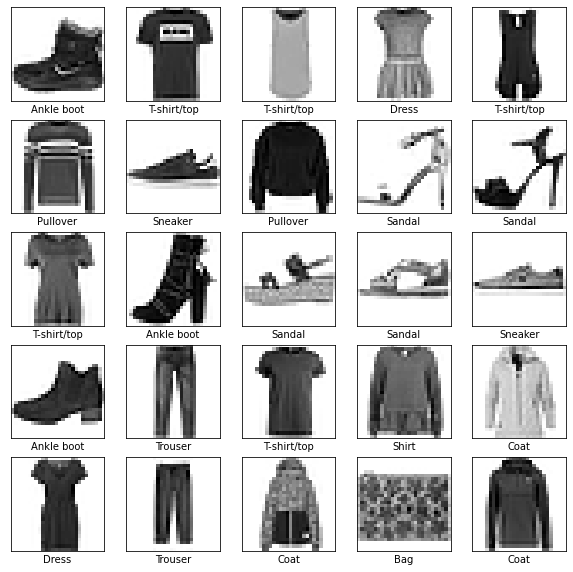

In [4]:
class_labels_unique = list(set(train_labels))
print(class_labels_unique)
print(train_images.shape)
print(test_images.shape)

train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

**IV. Definition and training of NN model**  
**TODOs**  
* Define a NN model using the Tensorflow Keras API for classifying the images, using a single hidden layer with 128 units. Some points to be noted : 
    * Add an initial layer to flatten the images from 2D to 1D.
    * Add a dropout of 0.2 to the hidden layer.
    * Set hidden and output layer activation functions as required.
    * Set the size of the output layer according to the number of classes.
* Compile the model using a suitable loss function.
* Print the model summary.
* How many trainable parameters are there in the model ?
* How does this compare with the number of training examples ? 

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(
    optimizer="adam", 
    loss='sparse_categorical_crossentropy',
    #loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(
    train_images, train_labels, epochs=5,
    # validation_split=0.2,
)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5328 - accuracy: 0.8097
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3990 - accuracy: 0.8553
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3673 - accuracy: 0.8663
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3449 - accuracy: 0.8745
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3305 - accuracy: 0.8787


**V. Evaluation of the model**  
* Calculate the train accuracy and the test accuracy.

In [7]:
train_loss, train_acc = model.evaluate(train_images, train_labels)
print('Test accuracy:', train_acc)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2921 - accuracy: 0.8907
Test accuracy: 0.890749990940094
313/313 [==============================] - 1s 3ms/step - loss: 0.3599 - accuracy: 0.8705
Test accuracy: 0.8705000281333923


**VI. Analysis of predictions**  
* Plot the first X test images, their predicted label, and the true label
* Color correct predictions in blue, incorrect predictions in red

In [8]:
predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

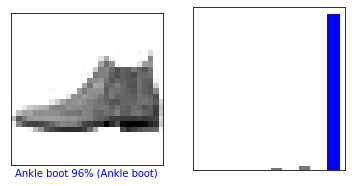

In [9]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

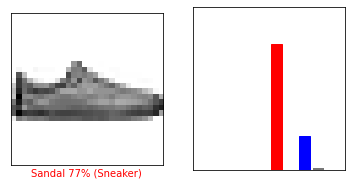

In [10]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

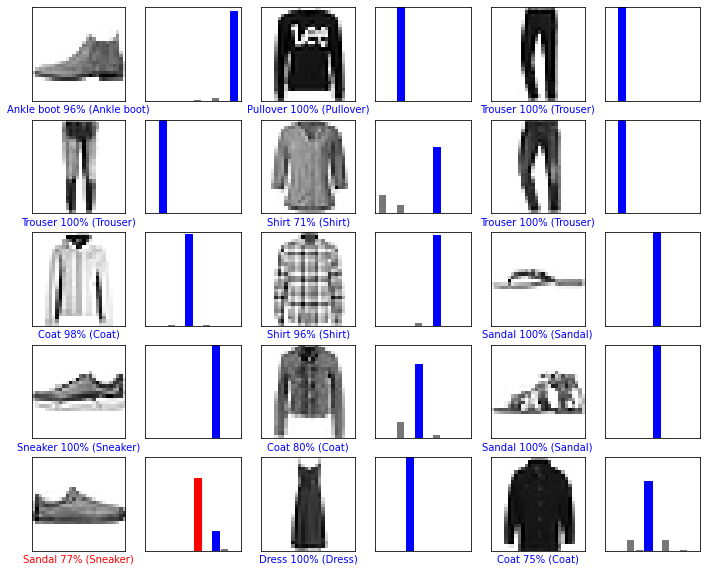

In [11]:

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
